In [1]:
import pandas as pd
from collections import Counter
df0 = pd.read_csv('cifar100-enriched_gemma-2b_layer0.csv')
df6 = pd.read_csv('cifar100-enriched_gemma-2b_layer6.csv')
df10 = pd.read_csv('cifar100-enriched_gemma-2b_layer10.csv')
df12 = pd.read_csv('cifar100-enriched_gemma-2b_layer12.csv')
df12it = pd.read_csv('cifar100-enriched_gemma-2b-it_layer12.csv')

In [2]:
df12

,image_id,fine_label,coarse_label,retrieved_features
0,0,mountain,large_natural_outdoor_scenes,"{""496"": ""elements related to warmth and comfor..."
1,1,forest,large_natural_outdoor_scenes,"{""145"": ""instances of expressions related to f..."
2,2,seal,aquatic_mammals,"{""898"": ""specific months of the year"", ""1435"":..."
3,3,mushroom,fruit_and_vegetables,"{""1001"": "" phrases that express visual or aest..."
4,4,sea,large_natural_outdoor_scenes,"{""1645"": "" instances where sentences begin, in..."
...,...,...,...,...
9995,9995,sweet_pepper,fruit_and_vegetables,"{""1645"": "" instances where sentences begin, in..."
9996,9996,butterfly,insects,"{""898"": ""specific months of the year"", ""1435"":..."
9997,9997,mushroom,fruit_and_vegetables,"{""898"": ""specific months of the year"", ""1001"":..."
9998,9998,leopard,large_carnivores,"{""614"": "" occurrences of the word \""then\"" in ..."


In [35]:
def get_feature_counts(df):
    
    all_keys = []
    for features in df['retrieved_features']:
        feature_dict = eval(features)  # Convert string to dictionary
        all_keys.extend(feature_dict.keys())
        
    x = Counter(all_keys).most_common()
    print('before:',len(x))
    # now i want to remove key value > 1000 from feature_dict
    x = dict(x)
    for key in list(x.keys()):
        if x[key] > 1000:
            del x[key]
    print('after:',len(x))
    print('=====')
    return x

# 265
# 1186
# 2213
# 1823
# 2016

feature_counts0 = get_feature_counts(df0)
feature_counts6 = get_feature_counts(df6)
feature_counts10 = get_feature_counts(df10)
feature_counts12 = get_feature_counts(df12)
feature_counts12it = get_feature_counts(df12it)

def clean_features(df, feature_counts):
    new_features = []
    for features in df['retrieved_features']:
        features = eval(features)
        features = {k:v for k,v in features.items() if k in feature_counts}
        new_features.append(features)
    df['cleaned_features'] = new_features
    return df

df0 = clean_features(df0, feature_counts0)
df6 = clean_features(df6, feature_counts6)
df10 = clean_features(df10, feature_counts10)
df12 = clean_features(df12, feature_counts12)
df12it = clean_features(df12it, feature_counts12it)

before: 265
after: 230
=====
before: 1186
after: 1120
=====
before: 2213
after: 2124
=====
before: 1823
after: 1751
=====
before: 2016
after: 1913
=====


In [36]:
# print out all above numbers out of 10000
print('layer0:',sum([i!={} for i in df0['cleaned_features']])/10000)
print('layer6:',sum([i!={} for i in df6['cleaned_features']])/10000)
print('layer10:',sum([i!={} for i in df10['cleaned_features']])/10000)
print('layer12:',sum([i!={} for i in df12['cleaned_features']])/10000)
print('layer12it:',sum([i!={} for i in df12it['cleaned_features']])/10000)

layer0: 0.6441
layer6: 0.9869
layer10: 0.999
layer12: 0.9994
layer12it: 0.9973


In [37]:
df12it

,image_id,fine_label,coarse_label,retrieved_features,cleaned_features
0,0,mountain,large_natural_outdoor_scenes,"{""284"": ""programming codes and technical instr...",{'341': 'information related to geological for...
1,1,forest,large_natural_outdoor_scenes,"{""284"": ""programming codes and technical instr...","{'2842': 'number values and percentages', '323..."
2,2,seal,aquatic_mammals,"{""92"": ""terms related to environmental advocac...",{'341': 'information related to geological for...
3,3,mushroom,fruit_and_vegetables,"{""92"": ""terms related to environmental advocac...",{'1638': 'words related to physical objects an...
4,4,sea,large_natural_outdoor_scenes,"{""284"": ""programming codes and technical instr...","{'1551': 'the beginning or end of text', '2821..."
...,...,...,...,...,...
9995,9995,sweet_pepper,fruit_and_vegetables,"{""92"": ""terms related to environmental advocac...",{'457': 'descriptions of mechanical structures...
9996,9996,butterfly,insects,"{""92"": ""terms related to environmental advocac...",{'341': 'information related to geological for...
9997,9997,mushroom,fruit_and_vegetables,"{""92"": ""terms related to environmental advocac...",{'8030': 'information related to personal deta...
9998,9998,leopard,large_carnivores,"{""284"": ""programming codes and technical instr...",{'1750': 'information related to historical ev...


In [38]:
# do a function where coarse_label is the same, check which key in cleaned_features appear the most top 5

def get_top5_features(df, coi='fine_label'):
    top5_features = []
    labels = set(df[coi])
    for i in labels:
        df_coarse = df[df[coi] == i]
        all_keys = []
        for features in df_coarse['cleaned_features']:
            all_keys.extend(features.keys())
        # iterate all and combine into one dict
        all_features = {}
        for features in df['cleaned_features']:
            all_features.update(features)
        x = Counter(all_keys).most_common()
        top5_features.append({i:x[:5]})
        print(i, x[:5], 'This is out of:', 10000/len(labels))
        print([all_features[i[0]] for i in x[:5]])
    return top5_features

top5_features0 = get_top5_features(df0)

sweet_pepper [('13922', 21), ('8197', 14), ('980', 13), ('12608', 11), ('13328', 8)] This is out of: 100.0
['prepositions', "mentions of a particular person's ranking or placement in a competition based on a specific time or score, often followed by the person who follows them in ranking or placement", 'references to sports teams and community organizations', 'information related to real estate listings and office spaces', 'statements starting with "is that", often expressing an interpretation or analysis of a situation or phenomenon']
beetle [('8212', 22), ('12608', 14), ('7184', 13), ('980', 10), ('13922', 8)] This is out of: 100.0
["possessive pronouns referring to one's own or someone else's belongings or relationships", 'information related to real estate listings and office spaces', 'potential future events or possibilities', 'references to sports teams and community organizations', 'prepositions']
keyboard [('980', 39), ('12608', 25), ('14092', 12), ('13328', 9), ('13922', 8)] T

In [39]:
top5_features12 = get_top5_features(df12)

sweet_pepper [('11559', 73), ('7860', 52), ('11988', 30), ('8354', 29), ('2304', 21)] This is out of: 100.0
['attributes related to wine acidity and grape cultivation', 'references to baked goods and their preparation', ' packaging details and materials used in products', ' herbs and fresh ingredients used in cooking', 'references to medical conditions and procedures']
beetle [('9390', 17), ('5004', 17), ('8354', 13), ('2597', 12), ('9352', 11)] This is out of: 100.0
['instances of deception and the concept of fooling oneself or others', ' references to problems and their resolutions', ' herbs and fresh ingredients used in cooking', ' motion-related descriptors and actions', 'references to relational dynamics or interactions']


keyboard [('7574', 83), ('8696', 64), ('12403', 51), ('8601', 49), ('15111', 48)] This is out of: 100.0
['technical specifications and features related to laptop and keyboard designs', 'guidelines for creating complex passwords', 'comparative phrases related to product features and quality', 'references to keyboards and typing-related terminology', ' instances of writing or text-related actions']
bottle [('11301', 98), ('11988', 53), ('15822', 43), ('11054', 43), ('3279', 42)] This is out of: 100.0
['alcoholic beverages and food pairings', ' packaging details and materials used in products', 'references to marketing practices and their ethical implications', ' references to whiskey events or festivals', 'regulatory language pertaining to food labeling and safety']
clock [('4870', 98), ('4341', 44), ('14131', 41), ('12184', 34), ('11867', 34)] This is out of: 100.0
[' references to time zones and clocks', ' specific references to instruments and their functionalities', 'references to je

In [40]:
top5_features12it = get_top5_features(df12it)

sweet_pepper [('8832', 88), ('14496', 76), ('2628', 74), ('11189', 50), ('13650', 46)] This is out of: 100.0
['mentions of healthy eating habits and importance of avoiding certain types of fats', 'mentions of foods, particularly fruits and vegetables', 'ingredients and cooking instructions in recipes', 'ingredients and instructions in a recipe', 'information related to the transportation and processing of food products']
beetle [('9774', 18), ('8047', 18), ('4055', 17), ('341', 16), ('15401', 12)] This is out of: 100.0
['references to aspects of plant ecology, particularly the breakdown of organic matter', 'information related to woodworking techniques and products', 'scenes of violence and aftermath in a setting like a house or town', 'information related to geological formations and events, particularly focusing on geological phenomena such as erosion, volcanic rocks, and submarine geology', 'mentions of geographical locations and cartography techniques']
keyboard [('4897', 82), ('15

In [41]:
top5_features12 = get_top5_features(df12, coi='coarse_label')

insects [('8028', 107), ('8354', 75), ('5004', 74), ('7320', 64), ('9390', 63)] This is out of: 500.0
['instances of the word "excellent."', ' herbs and fresh ingredients used in cooking', ' references to problems and their resolutions', 'keywords related to honey and bees', 'instances of deception and the concept of fooling oneself or others']
large_carnivores [('9557', 124), ('16131', 110), ('3053', 99), ('21', 89), ('4964', 87)] This is out of: 500.0
['references to dogs and related activities', 'descriptive phrases related to dental health and care', ' words associated with auditory experiences and perceptions', ' mentions of cats and related terms', 'references to brand names and specific product descriptions']
non-insect_invertebrates [('5451', 137), ('15111', 101), ('14131', 75), ('5004', 75), ('12051', 75)] This is out of: 500.0
['mentions of seafood and related culinary terms', ' instances of writing or text-related actions', 'references to jewelry and related products', ' ref

In [42]:
top5_features12it = get_top5_features(df12it, coi='coarse_label')

insects [('9774', 84), ('8047', 81), ('10076', 78), ('3686', 67), ('12721', 59)] This is out of: 500.0
['references to aspects of plant ecology, particularly the breakdown of organic matter', 'information related to woodworking techniques and products', 'references to bees, hives, and related terms', 'references to birds, including specific types and behaviors', 'details about the arrangement of molecules in ice crystals']
large_carnivores [('15611', 182), ('10198', 174), ('11118', 144), ('9539', 141), ('11353', 131)] This is out of: 500.0
['mentions of dogs', 'descriptions of voices and accents', 'descriptions of loud, aggressive, and masculine behavior', 'mentions of cats', 'historical or factual information from various fields, including sports, genetics, and family history']
non-insect_invertebrates [('1951', 127), ('12721', 105), ('3674', 98), ('2296', 82), ('11971', 79)] This is out of: 500.0
['mentions of various types of snakes', 'details about the arrangement of molecules in i

large_omnivores_and_herbivores [('796', 190), ('5555', 138), ('15611', 119), ('1750', 116), ('8050', 112)] This is out of: 500.0
['information related to animal feeding practices and manure usage in farming', 'words related to horses and horse racing', 'mentions of dogs', 'information related to historical events and figures, particularly surrounding births, deaths, and notable actions', 'adjectives and descriptions related to size, scale, and extremes']
fruit_and_vegetables [('14496', 385), ('8832', 176), ('2307', 148), ('10763', 146), ('11189', 145)] This is out of: 500.0
['mentions of foods, particularly fruits and vegetables', 'mentions of healthy eating habits and importance of avoiding certain types of fats', 'descriptions related to scientific experiments or observations', 'information related to financial data and statistics', 'ingredients and instructions in a recipe']
medium_mammals [('9539', 197), ('321', 119), ('15611', 111), ('1750', 101), ('13162', 99)] This is out of: 50

In [10]:
# TODO
# get these vectors, get their pre vit embedding, post vit embedding, and the difference, and top five activation patterns
# then plot them


In [43]:
df12

,image_id,fine_label,coarse_label,retrieved_features,cleaned_features
0,0,mountain,large_natural_outdoor_scenes,"{""496"": ""elements related to warmth and comfor...",{'496': 'elements related to warmth and comfor...
1,1,forest,large_natural_outdoor_scenes,"{""145"": ""instances of expressions related to f...",{'145': 'instances of expressions related to f...
2,2,seal,aquatic_mammals,"{""898"": ""specific months of the year"", ""1435"":...",{'1814': ' references to nests and chicks in r...
3,3,mushroom,fruit_and_vegetables,"{""1001"": "" phrases that express visual or aest...",{'2401': ' references to environmental conserv...
4,4,sea,large_natural_outdoor_scenes,"{""1645"": "" instances where sentences begin, in...",{'3005': ' mentions of anonymous users and rel...
...,...,...,...,...,...
9995,9995,sweet_pepper,fruit_and_vegetables,"{""1645"": "" instances where sentences begin, in...",{'4193': 'details related to the lifecycle and...
9996,9996,butterfly,insects,"{""898"": ""specific months of the year"", ""1435"":...",{'2059': ' verbs related to collaboration and ...
9997,9997,mushroom,fruit_and_vegetables,"{""898"": ""specific months of the year"", ""1001"":...","{'7065': 'references to grass', '8354': ' herb..."
9998,9998,leopard,large_carnivores,"{""614"": "" occurrences of the word \""then\"" in ...","{'614': ' occurrences of the word ""then"" in va..."


In [45]:
import requests
import torch
from PIL import Image
from transformers import LlavaForConditionalGeneration, AutoProcessor
import pandas as pd
from sae_lens import SAE
from datasets import load_dataset
from tqdm import tqdm
import json
from torch.utils.data import DataLoader

# Standard imports
import os
import torch
from tqdm import tqdm

# Set the environment variable to use only GPU 1
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

if torch.cuda.is_available():
    device = "cuda:1"
else:
    device = "cpu"

print(f"Device: {device}")

release = "gemma-2b-it"
layer = 12

def create_vector(size, indices):
    """
    Create a vector of given size where the elements at the specified indices are 1 and the rest are 0.

    Parameters:
    size (int): The size of the vector.
    indices (list of int): The indices to be set to 1.

    Returns:
    torch.Tensor: The resulting vector.
    """
    vector = torch.zeros(1, size)
    for index in indices:
        vector[0, index] = 1
    return vector.to(device)

def get_activated_sae(release, layer, df):
    sae, cfg_dict, sparsity = SAE.from_pretrained(
        release=f"{release}-res-jb",
        sae_id=f"blocks.{layer}.hook_resid_post",
        device=device
    )
    # default dict of dict where all keys are id from 0-cfg_dict['d_sae'], and it contains count all start from 0 and the sae decode vector of the id
    sae_dict = {i:{'count':0, 'vector':create_vector(cfg_dict['d_sae'], [i])@sae.W_dec} for i in range(cfg_dict['d_sae'])}
    for i in df['cleaned_features']:
        if i != {}:
            for sae_id in i.keys():
                sae_dict[int(sae_id)]['count'] += 1
    return sae_dict

dict_12 = get_activated_sae(release, layer, df12)

Device: cuda:1


NameError: name 'dict12' is not defined

In [64]:
dict_12

{0: {'count': 0,
  'vector': tensor([[-0.0289,  0.0290,  0.0271,  ..., -0.0452, -0.0041,  0.0211]],
         device='cuda:1', grad_fn=<MmBackward0>)},
 1: {'count': 2,
  'vector': tensor([[-0.0143,  0.0438,  0.0210,  ...,  0.0070, -0.0185,  0.0136]],
         device='cuda:1', grad_fn=<MmBackward0>)},
 2: {'count': 0,
  'vector': tensor([[ 0.0324,  0.0426,  0.0010,  ..., -0.0086, -0.0125, -0.0035]],
         device='cuda:1', grad_fn=<MmBackward0>)},
 3: {'count': 0,
  'vector': tensor([[-0.0226,  0.0059,  0.0279,  ...,  0.0143,  0.0272, -0.0243]],
         device='cuda:1', grad_fn=<MmBackward0>)},
 4: {'count': 0,
  'vector': tensor([[ 0.0027, -0.0233, -0.0239,  ...,  0.0463, -0.0016,  0.0071]],
         device='cuda:1', grad_fn=<MmBackward0>)},
 5: {'count': 0,
  'vector': tensor([[ 0.0048, -0.0381,  0.0129,  ..., -0.0230,  0.0169,  0.0226]],
         device='cuda:1', grad_fn=<MmBackward0>)},
 6: {'count': 0,
  'vector': tensor([[ 0.0047,  0.0809, -0.0057,  ..., -0.0324, -0.0136, -0.01

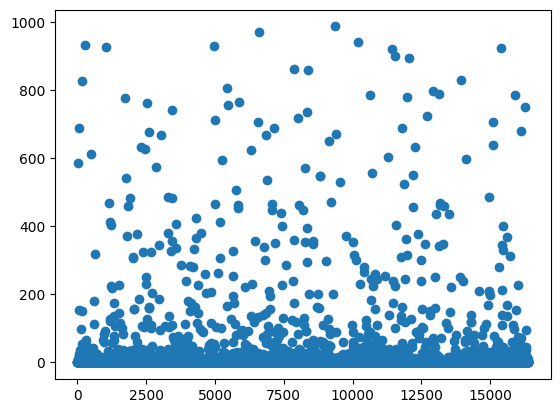

In [63]:
counts = [dict_12[i]['count'] for i in dict_12]

import matplotlib.pyplot as plt
plt.scatter(range(len(counts)), counts)
plt.show()


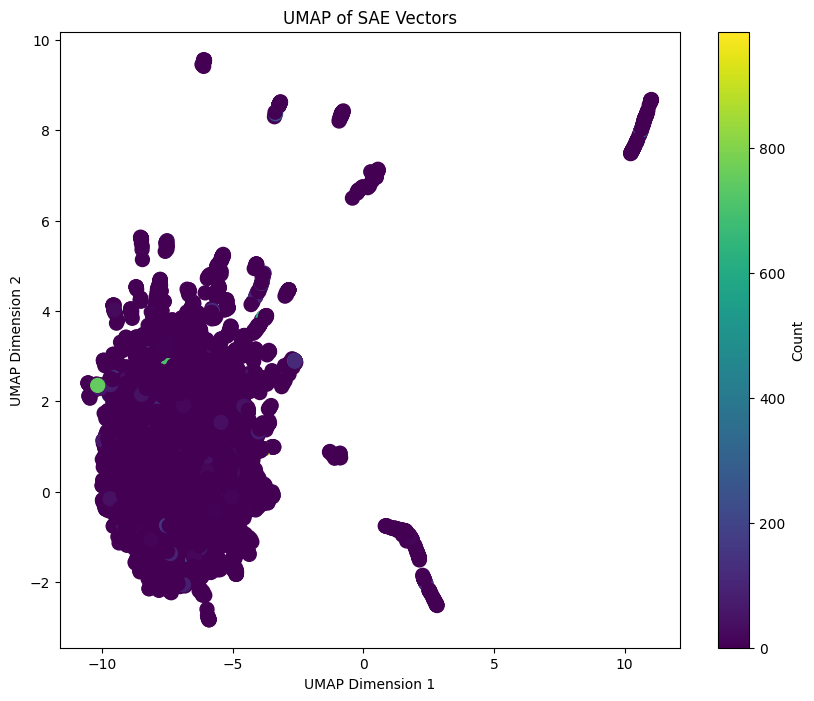

In [66]:
import umap
import matplotlib.colors as mcolors

# Assuming sae_dict is obtained from get_activated_sae
sae_dict = get_activated_sae(release, layer, df12)

# Extract vectors and counts
vectors = [sae_dict[key]['vector'].detach().cpu().numpy().flatten() for key in sae_dict]
counts = [sae_dict[key]['count'] for key in sae_dict]

# Perform UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(vectors)

# Create a custom colormap
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=min(counts), vmax=max(counts))

# Plot the UMAP embedding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=counts, cmap=cmap, norm=norm, s=100)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Count')

# Add labels and title
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP of SAE Vectors')

# Show the plot
plt.show()

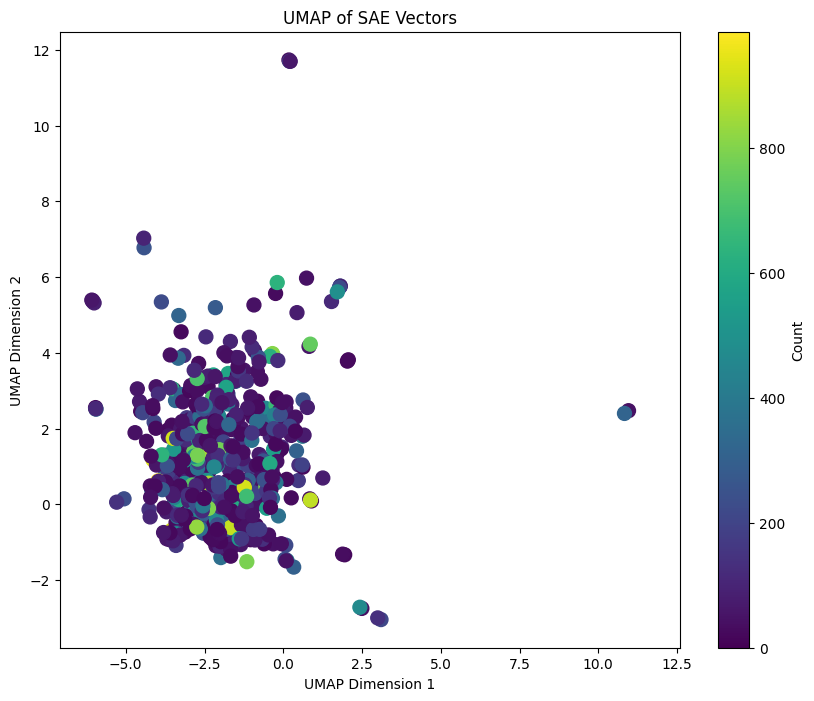

In [68]:
# Extract vectors and counts
vectors = [sae_dict[key]['vector'].detach().cpu().numpy().flatten() for key in sae_dict]
counts = [sae_dict[key]['count'] for key in sae_dict]

# Perform UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(vectors)

# Create a custom colormap
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=min(counts), vmax=max(counts))

# Create an array for alpha values based on counts
alphas = np.array([1 if count >= 20 else 0 for count in counts])

# Plot the UMAP embedding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=counts, cmap=cmap, norm=norm, s=100, alpha=alphas)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Count')

# Add labels and title
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP of SAE Vectors')

# Show the plot
plt.show()